In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import warnings

# Désactiver les warnings
warnings.filterwarnings('ignore')

# Chemins des fichiers Open Medic de 2017 à 2023
data_paths = {
    '2017': 'medicament/openmedic/OPEN_MEDIC_2017.CSV',
    '2018': 'medicament/openmedic/OPEN_MEDIC_2018.CSV',
    '2019': 'medicament/openmedic/OPEN_MEDIC_2019.CSV',
    '2020': 'medicament/openmedic/OPEN_MEDIC_2020.CSV',
    '2021': 'medicament/openmedic/OPEN_MEDIC_2021.CSV',
    '2022': 'medicament/openmedic/OPEN_MEDIC_2022.CSV',
    '2023': 'medicament/openmedic/OPEN_MEDIC_2023.CSV'
}

## Nettoyage des Données

Dans cette section, nous effectuons le nettoyage et la normalisation des datasets Open Medic pour les années 2017 à 2023. Ces données proviennent d'un fichier CSV contenant des informations sur les médicaments prescrits et remboursés en France.

### Objectifs du Nettoyage :

- **Uniformisation des colonnes :**  
  Chaque année, les datasets peuvent présenter des variations dans les noms de colonnes (majuscules/minuscules, différences d'appellation). Pour assurer une cohérence dans les analyses, nous avons uniformisé tous les noms de colonnes en majuscules.

- **Conversion des types de données :**  
  Il est important de s'assurer que les colonnes ont le bon type de données. Par exemple, les colonnes représentant des catégories (comme le sexe, la spécialité des prescripteurs ou les régions) sont converties en type `category` pour une manipulation plus efficace. De même, les colonnes représentant des valeurs numériques (comme les montants remboursés ou les boîtes de médicaments vendues) sont converties en types numériques `float` ou `int` afin de faciliter les calculs.

- **Traitement des valeurs monétaires (REM et BSE) :**  
  Les colonnes représentant des montants remboursés et des bases de remboursement sont souvent formatées avec des virgules pour les décimales. Nous avons nettoyé ces colonnes pour remplacer les virgules par des points, et les avons converties en type `float` pour permettre les calculs.

- **Gestion des données manquantes :**  
  Des vérifications sont faites pour repérer d’éventuelles valeurs manquantes ou incorrectes dans certaines colonnes (par exemple, des régions ou des spécialités non renseignées). Cela nous permet de décider si ces valeurs doivent être imputées, corrigées ou simplement exclues des analyses.

In [2]:
# Chargement de tous les datasets Open Medic dans un dictionnaire avec encodage 'ISO-8859-1'
df_medic = {}
for year, path in data_paths.items():
    df_medic[year] = pd.read_csv(path, sep=';', encoding='ISO-8859-1')
    print(f"Dataset {year} chargé avec succès. Taille : {df_medic[year].shape}")

# --- Afficher les colonnes de chaque dataset pour identifier les différences ---
print("\nVérification des colonnes dans chaque dataset :")
for year, df in df_medic.items():
    print(f"Année {year} - Colonnes :")
    print(df.columns)
    print("\n")

Dataset 2017 chargé avec succès. Taille : (1806702, 21)
Dataset 2018 chargé avec succès. Taille : (1815551, 21)
Dataset 2019 chargé avec succès. Taille : (1836084, 21)
Dataset 2020 chargé avec succès. Taille : (1819396, 21)
Dataset 2021 chargé avec succès. Taille : (1820538, 21)
Dataset 2022 chargé avec succès. Taille : (1873493, 21)
Dataset 2023 chargé avec succès. Taille : (1926164, 21)

Vérification des colonnes dans chaque dataset :
Année 2017 - Colonnes :
Index(['ATC1', 'l_ATC1', 'ATC2', 'L_ATC2', 'ATC3', 'L_ATC3', 'ATC4', 'L_ATC4',
       'ATC5', 'L_ATC5', 'CIP13', 'L_CIP13', 'TOP_GEN', 'GEN_NUM', 'AGE',
       'sexe', 'BEN_REG', 'PSP_SPE', 'BOITES', 'REM', 'BSE'],
      dtype='object')


Année 2018 - Colonnes :
Index(['ATC1', 'l_ATC1', 'ATC2', 'L_ATC2', 'ATC3', 'L_ATC3', 'ATC4', 'L_ATC4',
       'ATC5', 'L_ATC5', 'CIP13', 'l_cip13', 'TOP_GEN', 'GEN_NUM', 'age',
       'sexe', 'BEN_REG', 'PSP_SPE', 'BOITES', 'REM', 'BSE'],
      dtype='object')


Année 2019 - Colonnes :
Index(['A

In [3]:
# --- Normaliser les colonnes : Uniformiser les noms de colonnes en majuscules ---
for year, df in df_medic.items():
    df.columns = df.columns.str.upper()  # Convertir les noms de colonnes en majuscules pour toutes les années

# Vérification après normalisation des colonnes
print("\nColonnes après normalisation :")
for year, df in df_medic.items():
    print(f"Année {year} - Colonnes après normalisation :")
    print(df.columns)
    print("\n")


Colonnes après normalisation :
Année 2017 - Colonnes après normalisation :
Index(['ATC1', 'L_ATC1', 'ATC2', 'L_ATC2', 'ATC3', 'L_ATC3', 'ATC4', 'L_ATC4',
       'ATC5', 'L_ATC5', 'CIP13', 'L_CIP13', 'TOP_GEN', 'GEN_NUM', 'AGE',
       'SEXE', 'BEN_REG', 'PSP_SPE', 'BOITES', 'REM', 'BSE'],
      dtype='object')


Année 2018 - Colonnes après normalisation :
Index(['ATC1', 'L_ATC1', 'ATC2', 'L_ATC2', 'ATC3', 'L_ATC3', 'ATC4', 'L_ATC4',
       'ATC5', 'L_ATC5', 'CIP13', 'L_CIP13', 'TOP_GEN', 'GEN_NUM', 'AGE',
       'SEXE', 'BEN_REG', 'PSP_SPE', 'BOITES', 'REM', 'BSE'],
      dtype='object')


Année 2019 - Colonnes après normalisation :
Index(['ATC1', 'L_ATC1', 'ATC2', 'L_ATC2', 'ATC3', 'L_ATC3', 'ATC4', 'L_ATC4',
       'ATC5', 'L_ATC5', 'CIP13', 'L_CIP13', 'TOP_GEN', 'GEN_NUM', 'AGE',
       'SEXE', 'BEN_REG', 'PSP_SPE', 'BOITES', 'REM', 'BSE'],
      dtype='object')


Année 2020 - Colonnes après normalisation :
Index(['ATC1', 'L_ATC1', 'ATC2', 'L_ATC2', 'ATC3', 'L_ATC3', 'ATC4', 'L_ATC

In [7]:
# Vérification des types de données dans chaque dataset
for year, df in df_medic.items():
    print(f"Types de données dans le dataset de {year} :")
    print(df.dtypes)
    print("\n")

Types de données dans le dataset de 2017 :
ATC1         object
L_ATC1       object
ATC2         object
L_ATC2       object
ATC3         object
L_ATC3       object
ATC4         object
L_ATC4       object
ATC5         object
L_ATC5       object
CIP13         int64
L_CIP13      object
TOP_GEN    category
GEN_NUM       int64
AGE           int64
SEXE       category
BEN_REG    category
PSP_SPE    category
BOITES        int64
REM         float64
BSE         float64
dtype: object


Types de données dans le dataset de 2018 :
ATC1         object
L_ATC1       object
ATC2         object
L_ATC2       object
ATC3         object
L_ATC3       object
ATC4         object
L_ATC4       object
ATC5         object
L_ATC5       object
CIP13         int64
L_CIP13      object
TOP_GEN    category
GEN_NUM       int64
AGE           int64
SEXE       category
BEN_REG    category
PSP_SPE    category
BOITES        int64
REM         float64
BSE         float64
dtype: object


Types de données dans le dataset de 2019 :

In [9]:
# Nettoyage et formatage des colonnes REM et BSE en float
for year, df in df_medic.items():
    # Nettoyer et convertir les colonnes REM et BSE uniquement si elles sont de type 'object'
    if df['REM'].dtype == 'object':
        df['REM'] = df['REM'].str.replace('.', '', regex=False).str.replace(',', '.').astype(float)
    
    if df['BSE'].dtype == 'object':
        df['BSE'] = df['BSE'].str.replace('.', '', regex=False).str.replace(',', '.').astype(float)

    # Convertir les colonnes catégoriques en 'category'
    df['TOP_GEN'] = df['TOP_GEN'].astype('category')
    df['SEXE'] = df['SEXE'].astype('category')
    df['BEN_REG'] = df['BEN_REG'].astype('category')
    df['PSP_SPE'] = df['PSP_SPE'].astype('category')

    # Vérification après conversion
    print(f"Dataset {year} - Types après conversion :")
    print(df.dtypes)
    print("\n")


Dataset 2017 - Types après conversion :
ATC1         object
L_ATC1       object
ATC2         object
L_ATC2       object
ATC3         object
L_ATC3       object
ATC4         object
L_ATC4       object
ATC5         object
L_ATC5       object
CIP13         int64
L_CIP13      object
TOP_GEN    category
GEN_NUM       int64
AGE           int64
SEXE       category
BEN_REG    category
PSP_SPE    category
BOITES        int64
REM         float64
BSE         float64
dtype: object


Dataset 2018 - Types après conversion :
ATC1         object
L_ATC1       object
ATC2         object
L_ATC2       object
ATC3         object
L_ATC3       object
ATC4         object
L_ATC4       object
ATC5         object
L_ATC5       object
CIP13         int64
L_CIP13      object
TOP_GEN    category
GEN_NUM       int64
AGE           int64
SEXE       category
BEN_REG    category
PSP_SPE    category
BOITES        int64
REM         float64
BSE         float64
dtype: object


Dataset 2019 - Types après conversion :
ATC1    

In [11]:
# Filtrer par PSP_SPE = 7 et compter les entrées différentes (basé sur la colonne CIP13 par exemple)
for year, df in df_medic.items():
    # Filtrer les lignes où PSP_SPE = 7
    df_psp_7 = df[df['PSP_SPE'] == 7]
    
    # Compter les entrées différentes, ici par exemple par le nombre de médicaments uniques (CIP13)
    unique_entries = df_psp_7['CIP13'].nunique()
    
    # Afficher le nombre d'entrées différentes pour cette spécialité et cette année
    print(f"Année {year} - Nombre d'entrées différentes pour PSP_SPE = 7 : {unique_entries}")

Année 2017 - Nombre d'entrées différentes pour PSP_SPE = 7 : 3680
Année 2018 - Nombre d'entrées différentes pour PSP_SPE = 7 : 3660
Année 2019 - Nombre d'entrées différentes pour PSP_SPE = 7 : 3690
Année 2020 - Nombre d'entrées différentes pour PSP_SPE = 7 : 3580
Année 2021 - Nombre d'entrées différentes pour PSP_SPE = 7 : 3547
Année 2022 - Nombre d'entrées différentes pour PSP_SPE = 7 : 3628
Année 2023 - Nombre d'entrées différentes pour PSP_SPE = 7 : 3672


In [12]:
# Boucle pour extraire les 10 médicaments les plus vendus pour PSP_SPE = 7 chaque année
for year, df in df_medic.items():
    # Filtrer pour PSP_SPE = 7 gynecologie
    df_psp_7 = df[df['PSP_SPE'] == 7]
    
    # Grouper par médicament et calculer le total des boîtes délivrées
    top_meds = df_psp_7.groupby('L_CIP13')['BOITES'].sum().sort_values(ascending=False).head(10)
    
    # Afficher les résultats pour chaque année
    print(f"Année {year} - Top 10 des médicaments les plus vendus (PSP_SPE = 7) :")
    print(top_meds)
    print("\n")

Année 2017 - Top 10 des médicaments les plus vendus (PSP_SPE = 7) :
L_CIP13
DUPHASTON 10 MG CPR 10             953593
LEELOO 0,1 MG/0,02 MG Gé CPR 63    761896
CHLORMADINONE MYLAN 10MG CPR 12    751280
OPTIMIZETTE Gé 75 MCG CPR 84       718331
NOMEGESTROL MYLAN 5MG CPR 10       643871
ACIDE FOLIQUE CCD 0,4MG CPR 30     587571
MONAZOL 300MG OVULE 1              495990
SPASFON CPR 30                     483268
OPTILOVA 20 MCG/100 MCG CPR 84     468338
CHLORMADINONE TEVA 10MG CPR 12     465724
Name: BOITES, dtype: int64


Année 2018 - Top 10 des médicaments les plus vendus (PSP_SPE = 7) :
L_CIP13
DUPHASTON 10 MG CPR 10             892722
CHLORMADINONE MYLAN 10MG CPR 12    787985
OPTIMIZETTE Gé 75 MCG CPR 84       745236
LEELOO 0,1 MG/0,02 MG Gé CPR 63    684729
NOMEGESTROL MYLAN 5MG CPR 10       671513
CHLORMADINONE TEVA 10MG CPR 12     538529
OPTILOVA 20 MCG/100 MCG CPR 84     480754
ACIDE FOLIQUE CCD 0,4MG CPR 30     467800
SPASFON CPR 30                     466452
DOLIPRANE 1G CPR 8   

In [13]:
# Boucle pour extraire les 30 médicaments les plus vendus pour PSP_SPE = 7 chaque année
for year, df in df_medic.items():
    # Filtrer pour PSP_SPE = 7 (Gynécologie)
    df_psp_7 = df[df['PSP_SPE'] == 7]
    
    # Grouper par médicament et calculer le total des boîtes délivrées
    top_meds = df_psp_7.groupby('L_CIP13')['BOITES'].sum().sort_values(ascending=False).head(30)
    
    # Afficher les résultats pour chaque année
    print(f"Année {year} - Top 30 des médicaments les plus vendus (PSP_SPE = 7) :")
    print(top_meds)
    print("\n")

Année 2017 - Top 30 des médicaments les plus vendus (PSP_SPE = 7) :
L_CIP13
DUPHASTON 10 MG CPR 10                                   953593
LEELOO 0,1 MG/0,02 MG Gé CPR 63                          761896
CHLORMADINONE MYLAN 10MG CPR 12                          751280
OPTIMIZETTE Gé 75 MCG CPR 84                             718331
NOMEGESTROL MYLAN 5MG CPR 10                             643871
ACIDE FOLIQUE CCD 0,4MG CPR 30                           587571
MONAZOL 300MG OVULE 1                                    495990
SPASFON CPR 30                                           483268
OPTILOVA 20 MCG/100 MCG CPR 84                           468338
CHLORMADINONE TEVA 10MG CPR 12                           465724
DOLIPRANE 1G CPR 8                                       432624
TROPHIGIL GELULE VAGINALE 14                             422955
OESTRODOSE 0,06% GEL FL 80G 1/80 G                       416649
ESTREVA 0,1% GEL 1/50 G                                  405794
COLPOTROPHINE 10MG CAPSULE V

In [14]:
# Boucle pour afficher les médicaments avec ATC5 = G03DB01 chaque année
for year, df in df_medic.items():
    # Filtrer les médicaments ayant ATC5 = G03DB01
    df_atc_g03db01 = df[df['ATC5'] == 'G03DB01']
    
    # Afficher les résultats pour chaque année
    print(f"Année {year} - Médicaments avec ATC5 = G03DB01 (Dydrogestérone) :")
    print(df_atc_g03db01[['L_CIP13', 'BOITES', 'REM', 'BSE']].head(30))  # Afficher un échantillon de 30 entrées
    print("\n")

Année 2017 - Médicaments avec ATC5 = G03DB01 (Dydrogestérone) :
                       L_CIP13  BOITES       REM       BSE
802559  DUPHASTON 10 MG CPR 10      29     45.98     75.98
802560  DUPHASTON 10 MG CPR 10      67    105.59    175.54
802561  DUPHASTON 10 MG CPR 10      33     52.79     86.46
802562  DUPHASTON 10 MG CPR 10      20     34.06     52.40
802563  DUPHASTON 10 MG CPR 10      28     50.44     73.36
802564  DUPHASTON 10 MG CPR 10      20     34.06     52.40
802565  DUPHASTON 10 MG CPR 10      34     57.90     89.08
802566  DUPHASTON 10 MG CPR 10      26     35.76     68.12
802567  DUPHASTON 10 MG CPR 10      63    111.33    171.27
802568  DUPHASTON 10 MG CPR 10    3765   8132.40  12587.54
802569  DUPHASTON 10 MG CPR 10      96    206.75    318.08
802570  DUPHASTON 10 MG CPR 10    2278   4973.70   7686.68
802571  DUPHASTON 10 MG CPR 10      44     89.73    144.80
802572  DUPHASTON 10 MG CPR 10     633   1380.06   2105.40
802573  DUPHASTON 10 MG CPR 10      86    173.45   

In [15]:
# Boucle pour afficher tous les médicaments avec ATC5 = G03DB01 chaque année
for year, df in df_medic.items():
    # Filtrer les médicaments ayant ATC5 = G03DB01
    df_atc_g03db01 = df[df['ATC5'] == 'G03DB01']
    
    # Afficher tous les noms de médicaments uniques (L_CIP13) associés à G03DB01
    unique_meds = df_atc_g03db01['L_CIP13'].unique()
    
    # Afficher les résultats pour chaque année
    print(f"Année {year} - Médicaments associés à ATC5 = G03DB01 (Dydrogestérone) :")
    print(unique_meds)
    print("\n")

Année 2017 - Médicaments associés à ATC5 = G03DB01 (Dydrogestérone) :
['DUPHASTON 10 MG CPR 10']


Année 2018 - Médicaments associés à ATC5 = G03DB01 (Dydrogestérone) :
['DUPHASTON 10 MG CPR 10']


Année 2019 - Médicaments associés à ATC5 = G03DB01 (Dydrogestérone) :
['DUPHASTON 10MG CPR 10']


Année 2020 - Médicaments associés à ATC5 = G03DB01 (Dydrogestérone) :
['DUPHASTON 10MG CPR 10']


Année 2021 - Médicaments associés à ATC5 = G03DB01 (Dydrogestérone) :
['DUPHASTON 10MG CPR 10']


Année 2022 - Médicaments associés à ATC5 = G03DB01 (Dydrogestérone) :
['DUPHASTON 10MG CPR 10']


Année 2023 - Médicaments associés à ATC5 = G03DB01 (Dydrogestérone) :
['DUPHASTON 10MG CPR 10']




In [16]:
# Filtrer les données pour ATC5 = G03DB01 pour l'année 2017
df_2017_g03db01 = df_medic['2017'][df_medic['2017']['ATC5'] == 'G03DB01']

# Classer les données par nombre de boîtes vendues en ordre décroissant
top_10_g03db01 = df_2017_g03db01[['CIP13', 'BOITES', 'BEN_REG']].sort_values(by='BOITES', ascending=False).head(10)

# Afficher le résultat
print("Top 10 des identifiants avec le plus de boîtes vendues pour G03DB01 (Duphaston) en 2017 :")
print(top_10_g03db01)

Top 10 des identifiants avec le plus de boîtes vendues pour G03DB01 (Duphaston) en 2017 :
                CIP13  BOITES BEN_REG
802695  3400932192946  183104      11
802835  3400932192946   87856      84
802854  3400932192946   75449      93
802816  3400932192946   64999      76
802708  3400932192946   64601      11
802749  3400932192946   64053      32
802802  3400932192946   56119      75
802765  3400932192946   52015      44
802689  3400932192946   51210      11
802829  3400932192946   43865      84


In [17]:
# Filtrer les données pour ATC5 = G03DB01 pour l'année 2017
df_2017_g03db01 = df_medic['2017'][df_medic['2017']['ATC5'] == 'G03DB01']

# Regrouper par région (BEN_REG) et calculer le total des boîtes vendues
region_grouped = df_2017_g03db01.groupby('BEN_REG')['BOITES'].sum().sort_values(ascending=False)

# Afficher le résultat
print("Classement des régions par nombre de boîtes vendues pour G03DB01 (Duphaston) en 2017 :")
print(region_grouped)

Classement des régions par nombre de boîtes vendues pour G03DB01 (Duphaston) en 2017 :
BEN_REG
11    393635
84    215460
93    179430
32    166074
76    153986
75    139160
44    128779
28     86447
52     76828
53     66452
27     65699
5      59184
24     56296
99      4474
0         43
Name: BOITES, dtype: int64


In [31]:
# Dictionnaire associant les régions à leur population féminine (en divisant par 2)
population_femmes_par_region = {
    5: 2700000 / 2,   # Régions et Départements d'outre-mer
    11: 12300000 / 2, # Île-de-France
    24: 2600000 / 2,  # Centre-Val de Loire
    27: 2800000 / 2,  # Bourgogne-Franche-Comté
    28: 3300000 / 2,  # Normandie
    32: 6000000 / 2,  # Nord-Pas-de-Calais-Picardie
    44: 5500000 / 2,  # Alsace-Champagne-Ardenne-Lorraine
    52: 3800000 / 2,  # Pays de la Loire
    53: 3400000 / 2,  # Bretagne
    75: 6000000 / 2,  # Aquitaine-Limousin-Poitou-Charentes
    76: 6000000 / 2,  # Languedoc-Roussillon-Midi-Pyrénées
    84: 8000000 / 2,  # Auvergne-Rhône-Alpes
    93: 5100000 / 2,  # Provence-Alpes-Côte d'Azur et Corse
    0: None,          # Inconnu
    99: None          # Inconnu
}

# Filtrer les données pour ATC5 = G03DB01 pour l'année 2017
df_2017_g03db01 = df_medic['2017'][df_medic['2017']['ATC5'] == 'G03DB01']

# Regrouper par région (BEN_REG) et calculer le total des boîtes vendues
region_grouped = df_2017_g03db01.groupby('BEN_REG')['BOITES'].sum()

# Créer un DataFrame pour l'analyse avec la population féminine
df_analyse = pd.DataFrame({
    'Total_Boites': region_grouped,
    'Population_Femmes': region_grouped.index.map(population_femmes_par_region)  # Ajouter la population féminine de chaque région
})

# Calculer le ratio "1 femme sur X" = Population féminine / Boîtes vendues
df_analyse['Femmes_sur_Boite'] = df_analyse['Population_Femmes'] / df_analyse['Total_Boites']

# Trier par le ratio
df_analyse_sorted = df_analyse.sort_values(by='Femmes_sur_Boite', ascending=True)

# Afficher le résultat sous la forme "1 femme sur X"
print("Analyse des boîtes de Duphaston vendues par femme pour chaque région en 2017 (1 femme sur X) :")
print(df_analyse_sorted[['Total_Boites', 'Population_Femmes', 'Femmes_sur_Boite']])



Analyse des boîtes de Duphaston vendues par femme pour chaque région en 2017 (1 femme sur X) :
         Total_Boites  Population_Femmes  Femmes_sur_Boite
BEN_REG                                                   
93             179430          2550000.0         14.211670
11             393635          6150000.0         15.623611
32             166074          3000000.0         18.064236
84             215460          4000000.0         18.564931
28              86447          1650000.0         19.086839
76             153986          3000000.0         19.482291
27              65699          1400000.0         21.309305
44             128779          2750000.0         21.354413
75             139160          3000000.0         21.557919
5               59184          1350000.0         22.810219
24              56296          1300000.0         23.092227
52              76828          1900000.0         24.730567
53              66452          1700000.0         25.582375
0                  4

  BEN_REG  Total_Boites  Population_Femmes  Boites_par_Femme  \
0       0            43                NaN               NaN   
1       5         59184          1350000.0          0.043840   
2      11        393635          6150000.0          0.064006   
3      24         56296          1300000.0          0.043305   
4      27         65699          1400000.0          0.046928   

   Boites_par_Habitant  
0                  NaN  
1             0.043840  
2             0.064006  
3             0.043305  
4             0.046928  
Codes des régions dans les données géographiques (regions_geo): ['11' '24' '27' '28' '32' '44' '52' '53' '75' '76' '84' '93' '94']
Codes des régions dans les données des ventes (df_analyse): ['0' '5' '11' '24' '27' '28' '32' '44' '52' '53' '75' '76' '84' '93' '99']


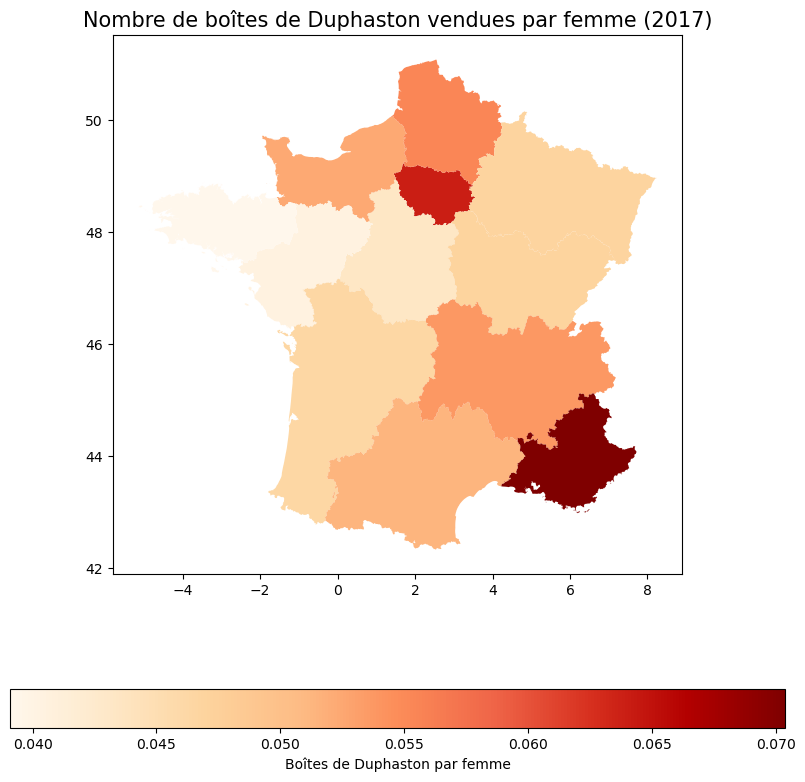

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Recalcul des boîtes par habitante pour chaque région
df_analyse['Boites_par_Habitant'] = df_analyse['Total_Boites'] / df_analyse['Population_Femmes']

# Vérifier que la colonne 'Boites_par_Habitant' est bien calculée
print(df_analyse.head())

# Assurez-vous que les codes des régions sont bien des chaînes de caractères dans les deux datasets
df_analyse['BEN_REG'] = df_analyse['BEN_REG'].astype(str)

# Vérification des codes régionaux disponibles dans les deux ensembles de données
print("Codes des régions dans les données géographiques (regions_geo):", regions_geo['code'].unique())
print("Codes des régions dans les données des ventes (df_analyse):", df_analyse['BEN_REG'].unique())

# Fusionner les données géographiques avec les données sur les boîtes vendues par région
regions_data = regions_geo.merge(df_analyse, left_on='code', right_on='BEN_REG', how='left')

# Créer une carte choroplèthe avec le nombre de boîtes par femme
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
regions_data.plot(column='Boites_par_Habitant', ax=ax, legend=True, cmap='OrRd',
                  legend_kwds={'label': "Boîtes de Duphaston par femme",
                               'orientation': "horizontal"})

# Ajouter un titre
plt.title("Nombre de boîtes de Duphaston vendues par femme (2017)", fontsize=15)

# Afficher la carte
plt.show()


In [44]:
# Dictionnaire associant les régions à leur population féminine (en divisant par 2)
population_femmes_par_region = {
    5: 2700000 / 2,   # Régions et Départements d'outre-mer
    11: 12300000 / 2, # Île-de-France
    24: 2600000 / 2,  # Centre-Val de Loire
    27: 2800000 / 2,  # Bourgogne-Franche-Comté
    28: 3300000 / 2,  # Normandie
    32: 6000000 / 2,  # Nord-Pas-de-Calais-Picardie
    44: 5500000 / 2,  # Alsace-Champagne-Ardenne-Lorraine
    52: 3800000 / 2,  # Pays de la Loire
    53: 3400000 / 2,  # Bretagne
    75: 6000000 / 2,  # Aquitaine-Limousin-Poitou-Charentes
    76: 6000000 / 2,  # Languedoc-Roussillon-Midi-Pyrénées
    84: 8000000 / 2,  # Auvergne-Rhône-Alpes
    93: 5100000 / 2,  # Provence-Alpes-Côte d'Azur et Corse
    0: None,          # Inconnu
    99: None          # Inconnu
}

# Filtrer les données pour ATC5 = G03DB01 pour l'année 2023
df_2023_g03db01 = df_medic['2023'][df_medic['2023']['ATC5'] == 'G03DB01']

# Regrouper par région (BEN_REG) et calculer le total des boîtes vendues
region_grouped = df_2023_g03db01.groupby('BEN_REG')['BOITES'].sum()

# Créer un DataFrame pour l'analyse avec la population féminine
df_analyse = pd.DataFrame({
    'Total_Boites': region_grouped,
    'Population_Femmes': region_grouped.index.map(population_femmes_par_region)  # Ajouter la population féminine de chaque région
})

# Calculer le ratio "1 femme sur X" = Population féminine / Boîtes vendues
df_analyse['Femmes_sur_Boite'] = df_analyse['Population_Femmes'] / df_analyse['Total_Boites']

# Trier par le ratio
df_analyse_sorted = df_analyse.sort_values(by='Femmes_sur_Boite', ascending=True)

# Afficher le résultat sous la forme "1 femme sur X"
print("Analyse des boîtes de Duphaston vendues par femme pour chaque région en 2023 (1 femme sur X) :")
print(df_analyse_sorted[['Total_Boites', 'Population_Femmes', 'Femmes_sur_Boite']])


Analyse des boîtes de Duphaston vendues par femme pour chaque région en 2023 (1 femme sur X) :
         Total_Boites  Population_Femmes  Femmes_sur_Boite
BEN_REG                                                   
11             425424          6150000.0         14.456166
93             157363          2550000.0         16.204572
32             176065          3000000.0         17.039162
28              90238          1650000.0         18.284980
84             208392          4000000.0         19.194595
52              98205          1900000.0         19.347284
5               65601          1350000.0         20.578955
76             135862          3000000.0         22.081229
24              55520          1300000.0         23.414986
53              72001          1700000.0         23.610783
44             115702          2750000.0         23.767956
27              52969          1400000.0         26.430554
75             109353          3000000.0         27.434090
99               217

In [47]:
# Réinitialisation des index pour tous les datasets (de 2017 à 2023) afin d'éviter l'ambiguïté avec BEN_REG
for year in ['2017', '2018', '2019', '2020', '2021', '2022', '2023']:
    # Vérifier si le dataset existe dans df_medic
    if year in df_medic:
        # Réinitialiser l'index s'il y a une colonne ou un index BEN_REG pour éviter les ambiguïtés
        if 'BEN_REG' in df_medic[year].columns or 'BEN_REG' in df_medic[year].index.names:
            df_medic[year] = df_medic[year].reset_index(drop=True)
            print(f"Index réinitialisé pour le dataset {year}.")


Index réinitialisé pour le dataset 2017.
Index réinitialisé pour le dataset 2018.
Index réinitialisé pour le dataset 2019.
Index réinitialisé pour le dataset 2020.
Index réinitialisé pour le dataset 2021.
Index réinitialisé pour le dataset 2022.
Index réinitialisé pour le dataset 2023.


Codes des régions dans les données des ventes après correction: ['5' '11' '24' '27' '28' '32' '44' '52' '53' '75' '76' '84' '93' '99']


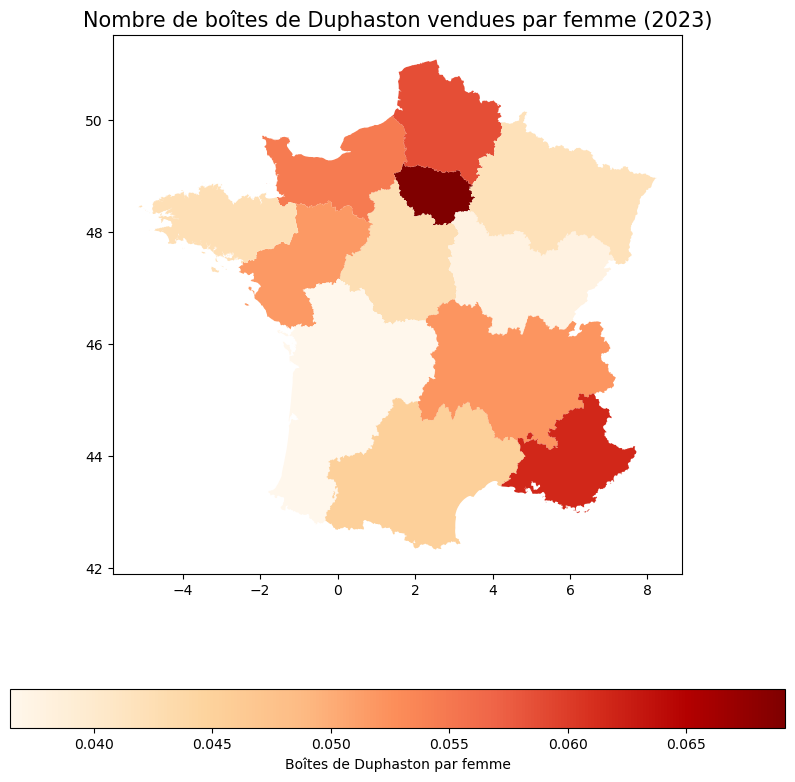

In [52]:
# Dictionnaire de correspondance entre les codes des régions dans df_analyse et les codes des régions françaises
code_region_mapping = {
    '0': '5',  # Régions et Départements d'outre-mer
    '1': '11', # Île-de-France
    '2': '24', # Centre-Val de Loire
    '3': '27', # Bourgogne-Franche-Comté
    '4': '28', # Normandie
    '5': '32', # Nord-Pas-de-Calais-Picardie
    '6': '44', # Alsace-Champagne-Ardenne-Lorraine
    '7': '52', # Pays de la Loire
    '8': '53', # Bretagne
    '9': '75', # Aquitaine-Limousin-Poitou-Charentes
    '10': '76',# Languedoc-Roussillon-Midi-Pyrénées
    '11': '84',# Auvergne-Rhône-Alpes
    '12': '93',# Provence-Alpes-Côte d'Azur et Corse
    '13': '99' # Inconnu
}

# Appliquer la correspondance des codes de régions
df_analyse['BEN_REG'] = df_analyse['BEN_REG'].map(code_region_mapping)

# Vérifier les correspondances après la correction
print("Codes des régions dans les données des ventes après correction:", df_analyse['BEN_REG'].unique())

# Fusionner les données géographiques avec les données sur les boîtes vendues par région
regions_data = regions_geo.merge(df_analyse, left_on='code', right_on='BEN_REG', how='left')

# Créer une carte choroplèthe avec le nombre de boîtes par femme
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
regions_data.plot(column='Boites_par_Habitant', ax=ax, legend=True, cmap='OrRd',
                  legend_kwds={'label': "Boîtes de Duphaston par femme",
                               'orientation': "horizontal"})

# Ajouter un titre
plt.title("Nombre de boîtes de Duphaston vendues par femme (2023)", fontsize=15)

# Afficher la carte
plt.show()


In [53]:
import pandas as pd

# Liste des années à analyser
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Créer un DataFrame pour stocker les résultats avec les régions comme index
df_summary = pd.DataFrame(index=population_femmes_par_region.keys())

# Boucle pour chaque année
for year in years:
    # Filtrer les données pour ATC5 = G03DB01 (Duphaston) pour chaque année
    df_year = df_medic[year][df_medic[year]['ATC5'] == 'G03DB01']
    
    # Regrouper par région (BEN_REG) et calculer le total des boîtes vendues
    region_grouped = df_year.groupby('BEN_REG')['BOITES'].sum()
    
    # Ajouter les résultats de chaque année dans le DataFrame récapitulatif
    df_summary[year] = region_grouped

# Remplacer les NaN par 0 pour éviter les erreurs de calcul
df_summary.fillna(0, inplace=True)

# DataFrame pour stocker les pourcentages de variation d'une année à l'autre
df_percentage = pd.DataFrame(index=population_femmes_par_region.keys())

# Calcul du pourcentage de variation
for i in range(1, len(years)):
    prev_year = years[i-1]
    curr_year = years[i]
    df_percentage[curr_year] = (df_summary[curr_year] - df_summary[prev_year]) / df_summary[prev_year] * 100

# Fonction pour formater les résultats avec les pourcentages de variation
def format_result_with_percentage(row):
    result = []
    for year in years:
        if year != '2017':
            # Ajouter le pourcentage de variation entre parenthèses
            result.append(f"{int(row[year])} ({row[year+'_pct']:+.2f}%)")
        else:
            # Première année, pas de pourcentage de variation
            result.append(f"{int(row[year])}")
    return result

# Ajouter les colonnes de pourcentage de variation au DataFrame original
for year in years[1:]:
    df_summary[year+'_pct'] = df_percentage[year]

# Appliquer le format et afficher les résultats
df_summary_formatted = df_summary.apply(format_result_with_percentage, axis=1)

# Afficher le DataFrame avec les résultats formatés
df_summary_formatted.columns = years  # Mettre les années comme noms de colonnes
df_summary_formatted = pd.DataFrame(df_summary_formatted.tolist(), index=df_summary.index, columns=years)

# Afficher les résultats
print(df_summary_formatted)



      2017             2018              2019             2020  \
5    59184   57096 (-3.53%)    58798 (+2.98%)   56321 (-4.21%)   
11  393635  391632 (-0.51%)   405020 (+3.42%)  409647 (+1.14%)   
24   56296   52920 (-6.00%)    52548 (-0.70%)   52219 (-0.63%)   
27   65699   59930 (-8.78%)    58725 (-2.01%)   58983 (+0.44%)   
28   86447   81652 (-5.55%)   92893 (+13.77%)   97201 (+4.64%)   
32  166074  162034 (-2.43%)  178973 (+10.45%)  169313 (-5.40%)   
44  128779  119221 (-7.42%)   116658 (-2.15%)  110946 (-4.90%)   
52   76828   77651 (+1.07%)   88596 (+14.10%)   86748 (-2.09%)   
53   66452   60527 (-8.92%)   71470 (+18.08%)   68220 (-4.55%)   
75  139160  135226 (-2.83%)   134386 (-0.62%)  127592 (-5.06%)   
76  153986  144090 (-6.43%)   144166 (+0.05%)  137713 (-4.48%)   
84  215460  198608 (-7.82%)   196864 (-0.88%)  206570 (+4.93%)   
93  179430  167905 (-6.42%)   168639 (+0.44%)  163677 (-2.94%)   
0       43   105 (+144.19%)      112 (+6.67%)     64 (-42.86%)   
99    4474

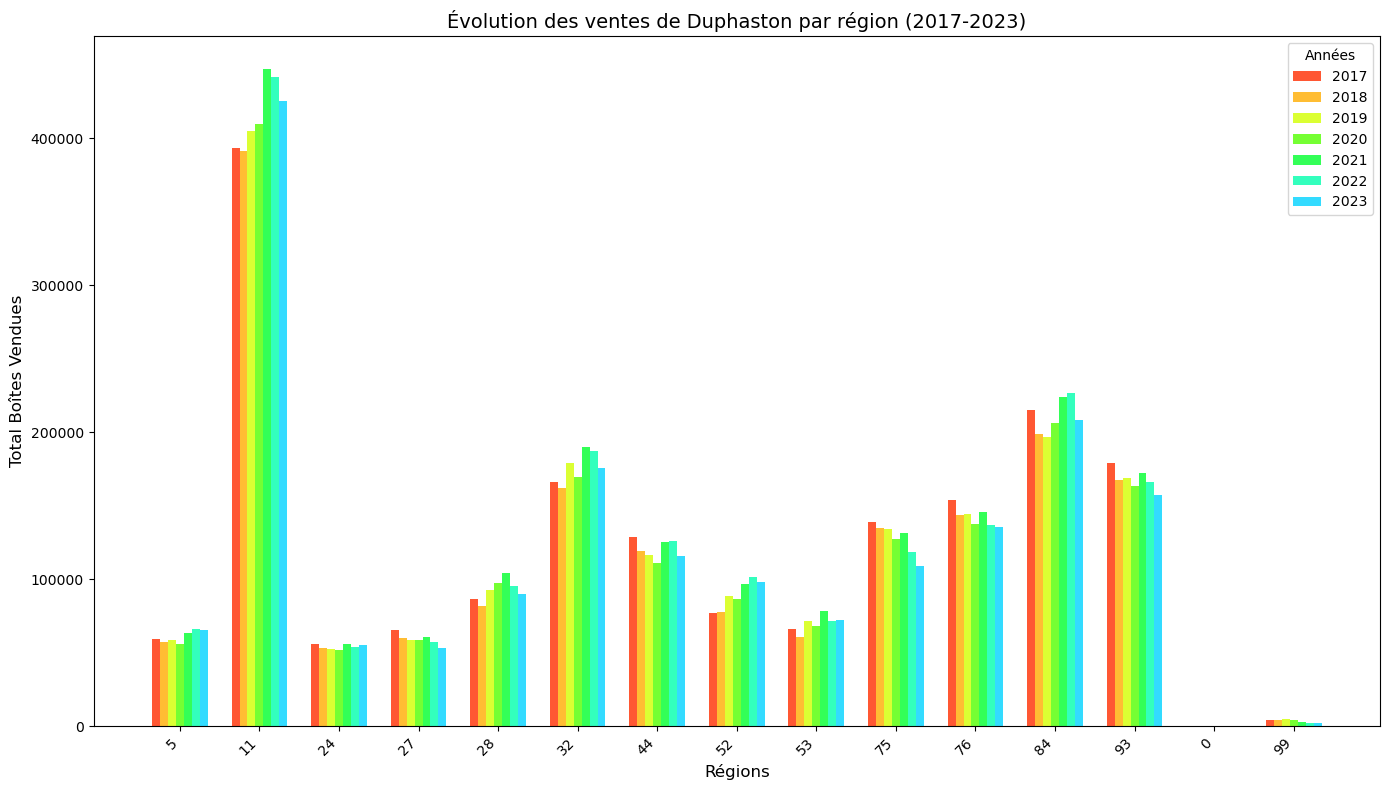

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Années à afficher sur l'axe des X
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Remplissage des données des ventes de Duphaston pour chaque région
df_summary_filled = df_summary.fillna(0)  # Remplacer les NaN par des 0 pour éviter les erreurs

# Régions à afficher
regions = df_summary_filled.index.astype(str)

# Configuration de la taille du graphique
fig, ax = plt.subplots(figsize=(14, 8))

# Création des positions sur l'axe des X pour chaque région
bar_width = 0.1
index = np.arange(len(regions))

# Couleurs pour chaque année
colors = ['#FF5733', '#FFBD33', '#DBFF33', '#75FF33', '#33FF57', '#33FFBD', '#33DBFF']

# Boucle pour chaque année pour créer les barres empilées
for i, year in enumerate(years):
    ax.bar(index + i * bar_width, df_summary_filled[year], bar_width, label=year, color=colors[i])

# Configuration de l'axe des X
ax.set_xlabel('Régions', fontsize=12)
ax.set_ylabel('Total Boîtes Vendues', fontsize=12)
ax.set_title('Évolution des ventes de Duphaston par région (2017-2023)', fontsize=14)
ax.set_xticks(index + (len(years) - 1) * bar_width / 2)
ax.set_xticklabels(regions, rotation=45, ha='right', fontsize=10)

# Légende et échelle des couleurs
ax.legend(title="Années", fontsize=10)

# Affichage du graphique
plt.tight_layout()
plt.show()


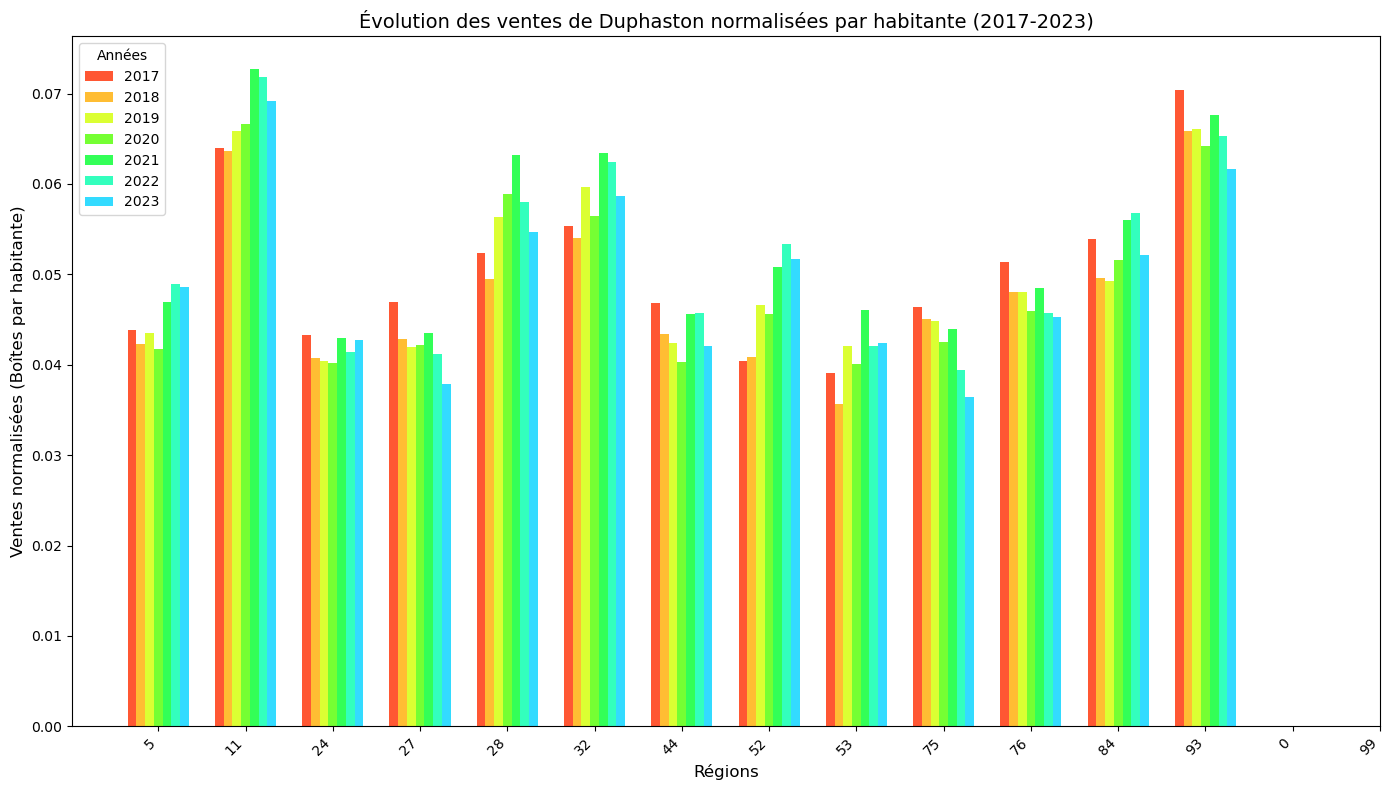

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Dictionnaire associant les régions à leur population féminine (en divisant par 2)
population_femmes_par_region = {
    5: 2700000 / 2,   # Régions et Départements d'outre-mer
    11: 12300000 / 2, # Île-de-France
    24: 2600000 / 2,  # Centre-Val de Loire
    27: 2800000 / 2,  # Bourgogne-Franche-Comté
    28: 3300000 / 2,  # Normandie
    32: 6000000 / 2,  # Nord-Pas-de-Calais-Picardie
    44: 5500000 / 2,  # Alsace-Champagne-Ardenne-Lorraine
    52: 3800000 / 2,  # Pays de la Loire
    53: 3400000 / 2,  # Bretagne
    75: 6000000 / 2,  # Aquitaine-Limousin-Poitou-Charentes
    76: 6000000 / 2,  # Languedoc-Roussillon-Midi-Pyrénées
    84: 8000000 / 2,  # Auvergne-Rhône-Alpes
    93: 5100000 / 2,  # Provence-Alpes-Côte d'Azur et Corse
    0: None,          # Inconnu
    99: None          # Inconnu
}

# Calculer les ventes normalisées (ventes par habitante) pour chaque région et chaque année
for year in ['2017', '2018', '2019', '2020', '2021', '2022', '2023']:
    df_summary[year + '_norm'] = df_summary[year] / df_summary.index.map(population_femmes_par_region)

# Années à afficher sur l'axe des X
years_norm = [year + '_norm' for year in ['2017', '2018', '2019', '2020', '2021', '2022', '2023']]

# Régions à afficher
regions = df_summary.index.astype(str)

# Configuration de la taille du graphique
fig, ax = plt.subplots(figsize=(14, 8))

# Création des positions sur l'axe des X pour chaque région
bar_width = 0.1
index = np.arange(len(regions))

# Couleurs pour chaque année
colors = ['#FF5733', '#FFBD33', '#DBFF33', '#75FF33', '#33FF57', '#33FFBD', '#33DBFF']

# Boucle pour chaque année pour créer les barres groupées normalisées
for i, year in enumerate(years_norm):
    ax.bar(index + i * bar_width, df_summary[year], bar_width, label=year[:4], color=colors[i])

# Configuration de l'axe des X
ax.set_xlabel('Régions', fontsize=12)
ax.set_ylabel('Ventes normalisées (Boîtes par habitante)', fontsize=12)
ax.set_title('Évolution des ventes de Duphaston normalisées par habitante (2017-2023)', fontsize=14)
ax.set_xticks(index + (len(years_norm) - 1) * bar_width / 2)
ax.set_xticklabels(regions, rotation=45, ha='right', fontsize=10)

# Légende et échelle des couleurs
ax.legend(title="Années", fontsize=10)

# Affichage du graphique
plt.tight_layout()
plt.show()
